<a href="https://colab.research.google.com/github/MukeshMishraReloaded/Unsupervised-Learning/blob/main/PreRead_PraticalSession_DataPreprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Problem Statement:**

Given a set of features, predict the prices of the houses.

So, this is a task of supervised learning.


##**Importing Libraries and Dataset:**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12, 10)
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as mse

In [ ]:
!gdown 1F9aD344ifJiKzRDlR4ZX0e4plDuP9-b9

Downloading...
From: https://drive.google.com/uc?id=1F9aD344ifJiKzRDlR4ZX0e4plDuP9-b9
To: /content/kaggle_houseprices_modified.csv
100% 459k/459k [00:00<00:00, 79.5MB/s]


In [ ]:
ds = pd.read_csv('/content/kaggle_houseprices_modified.csv')
ds.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,198075.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,199650.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,212325.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,237500.0


In [ ]:
ds[ds.columns[80:]].head()

,SalePrice
0,198075.0
1,199650.0
2,212325.0
3,140000.0
4,237500.0


- So, `SalePrice` is our target variable.

- Now, there are 79 features that are present in our dataset, and for such huge datasets out there; there will often be a data dictionary; using which you would be able to understand the data that will help during data pre-processing.

## **Data Pre-processing:**

###Imputation:

In [ ]:
todrop = ['Id']
categorical = ['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
               'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'RoofStyle', 'RoofMatl', 'HouseStyle',
               'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation', 'Heating', 'CentralAir',
               'Electrical', 'GarageType', 'PavedDrive', 'Fence', 'MiscFeature', 'MoSold', 'SaleType', 'SaleCondition']
continuous = ['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1',
              'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'MasVnrArea',
              'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
              'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch',
              '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'YrSold', 'SalePrice']
cat_to_con = ['ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
              'HeatingQC', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageFinish', 'GarageQual', 'GarageCond',
              'PoolQC', ]

- Logical NaNs: 'Alley', 'Fence', 'MiscFeature', 'MasVnrType', 'GarageType', 'FireplaceQu'
- Mode: 'Electrical'
- Median: 'LotFrontage', 'MasVnrArea'
- Mean: 'GarageYrBlt'
- Drop: PoolQC
Other techiniqes: Knn imputation, -- see if it increases baseline model's accuracy

<Axes: ylabel='Frequency'>

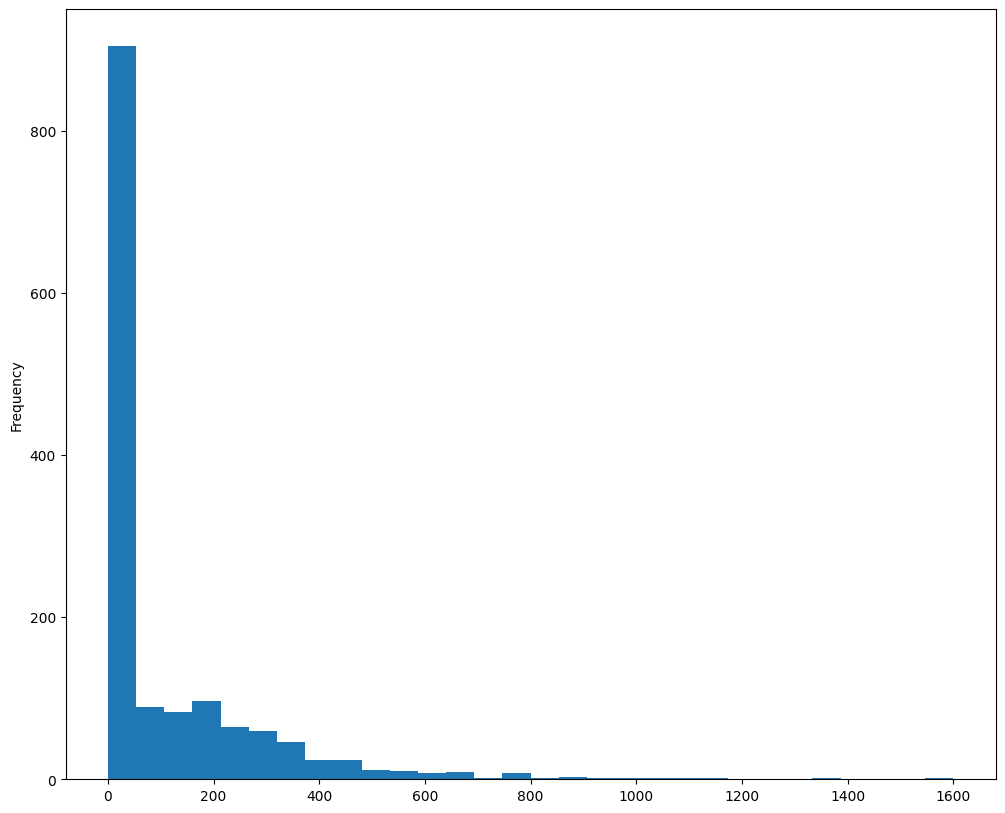

In [ ]:
ds['MasVnrArea'].plot(kind='hist', bins=30)

In [ ]:
# run the imputation when not making pipeline

ds['LotFrontage'] = ds['LotFrontage'].fillna(ds['LotFrontage'].median())
ds['MasVnrArea']  = ds['MasVnrArea'].fillna(ds['MasVnrArea'].median())
ds['GarageYrBlt'] = ds['GarageYrBlt'].fillna(ds['GarageYrBlt'].mean())
print(ds[continuous].isna().sum().sum())

0


###Encoding Features:

- First things first, we'll start with handling catrgorical features. So, how to find one?
  - This is where data dictionary comes handy. You can see that `MSSubClass` gas four classes: Fin, RFn, UnF, NA.
  - You will find similar features where the categorical values will be specified.

In [ ]:
def pre_processing(ds, todrop, categorical, cat_to_con):
  #dropping
  ds = ds.drop(columns=todrop)

  #categorical
  logical_nans = ['Alley', 'Fence', 'MiscFeature', 'MasVnrType', 'GarageType', ]
  for col in logical_nans:
      ds[col] = ds[col].fillna('NA')
  ds['Electrical'] = ds['Electrical'].fillna(ds['Electrical'].value_counts().index[0])  # mode
  print("no. of nans in categorical cols:", ds[categorical].isna().sum().sum())


  #cat_to_con
  ds['FireplaceQu'] = ds['FireplaceQu'].fillna('NA')
  logical_nans = ['FireplaceQu', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
                  'BsmtFinType2', 'GarageFinish', 'GarageQual', 'GarageCond']
  for col in logical_nans:
      ds[col] = ds[col].fillna('NA')

  ds.drop(columns = ['PoolQC'], inplace=True)
  cat_to_con.remove('PoolQC')
  print("no. of nans in cat_to_con cols:",ds[cat_to_con].isna().sum().sum())

  #target_encoding
  target = 'SalePrice'
  for col in categorical:
      ds[col] = ds.groupby([col])[target].transform('mean')

  #label encoding
  grp1 = ['GarageQual', 'GarageCond', 'FireplaceQu', 'KitchenQual', 'HeatingQC', 'BsmtCond', 'BsmtQual', 'ExterCond', 'ExterQual']
  for col in grp1:
      ds[col] = ds[col].map({'TA': 3, 'Fa': 2, 'NA': 0, 'Gd': 4, 'Po': 1, 'Ex': 5})

  for col in ['BsmtFinType1', 'BsmtFinType2']:
      ds[col] = ds[col].map({'GLQ':6, 'ALQ':5, 'Unf':1, 'Rec':3, 'BLQ':4, 'NA':0, 'LwQ':2})

  ds['BsmtExposure'] = ds['BsmtExposure'].map({'No':1, 'Gd':4, 'Mn':2, 'Av':3, 'NA':0})
  ds['Functional'] = ds['Functional'].map({'Typ':7, 'Min1':6, 'Maj1':3, 'Min2':5, 'Mod':4, 'Maj2':2, 'Sev':1, 'Sal':0})
  ds['GarageFinish'] = ds['GarageFinish'].map({'RFn':2, 'Unf':1, 'Fin':3, 'NA':0})

  print("total nans in the dataframe:", ds.isna().sum().sum())

  return ds

In [ ]:
ds = pre_processing(ds, todrop, categorical, cat_to_con)

no. of nans in categorical cols: 0
no. of nans in cat_to_con cols: 0
total nans in the dataframe: 0


In [ ]:
ds.columns[ds.isna().sum()>0]

Index([], dtype='object')

###Scaling:

- We need to do scaling on this dataset, and the main factor to decide which method to choose! Standard Scaling or MinMax scaling? Or any other scaling method?

- The best method here would be Standard Scaling. The reason being; outliers will effect both min and max values; and doing minmax scaler will probably be a bad way.

- Another reason not to choose MinMax scaler is:
  - Say the min values in the dataset is `x` and max value is `y`.
  - Now, when in production, if any value comes out of range mentioned above (x and y); the value after scaling can go outside the range of `0` and `1`.

  - The output based on this can't be reliable, it may or may not be correct, because model has never seen this value before.

In [ ]:
# run the scaling when not making pipeline.
# All the viz will work on the standardized and imputed data

from sklearn.preprocessing import MinMaxScaler, StandardScaler

scaler = StandardScaler()
ds_scaled = scaler.fit_transform(ds)

- We also need to think of the baseline model. Whether we'll use linear regression, or decision trees, or random forests!?

- So, when these types of usecases are hosted as a competition on Kaggle, `Random Forests` and `GBDT` are seen to perform better comparitively. So, in this session, we'll also use these.

**Q. Do we need to scale the data for these models?**
- For these models, we dont need to scale the data. But, since we've anyway done that above for features, we won't be scaling the target variable.

- Again, all these steps depend on the baseline model that you choose.